In [43]:
import pandas as pd
from IPython.display import display, HTML
from src.experiments import compare_guarantees_experiment

# settings

In [17]:
NUMBER_OF_EXPERIMENTS = 100
PRECISION = 10 # 6 decimal places

In [ ]:
def calc_raios(data. metric_cols, all_cols):
    ratios = pd.DataFrame()
    gr = ('dc_gr','familiar_share_gr', 'sb_gr')
    for g in ('dc_gr','familiar_share_gr', 'sb_gr'):
        for gd in guarantees_columns:
            if g == gd:
                continue

            ratios[f'{g}/{gd}'] = data[g]/data[gd]

    ratios['utility_type'] = data['utility_type']
    ratios['goods_num'] = data['goods_num']



def base_experiment(data, group_cols):
    random_exp_data = data.groupby(group_cols).first()[
        guarantees_columns
    ]
    display(random_exp_data)
    
    random_exp_data.plot(figsize=(20, 10))
    
    data['max_guarantee'] = data[guarantees_columns].idxmax(axis=1)
    data['min_guarantee'] = data[guarantees_columns].idxmin(axis=1)

    violate_max = data[data['max_min_gr'].round(PRECISION) < data[guarantees_columns].max(axis=1).round(PRECISION)]
    violate_min = data[data['min_max_gr'].round(PRECISION) > data[guarantees_columns].min(axis=1).round(PRECISION)]
    
    display(violate_max)
    display(violate_min)

# 1. Comparing guarantees

In [3]:
cg_exp = compare_guarantees_experiment.CompareGuaranteeExperiment()
cg_exp.run_and_save(NUMBER_OF_EXPERIMENTS)
cg_exp.columns

{'dc_gr',
 'familiar_share_gr',
 'goods_num',
 'max_min_gr',
 'min_max_gr',
 'sb_gr',
 'utility_type'}

In [4]:
guarantees_columns = cg_exp.columns - {'utility_type', 'goods_num'}
guarantees_columns

{'dc_gr', 'familiar_share_gr', 'max_min_gr', 'min_max_gr', 'sb_gr'}

In [5]:
data = cg_exp.load_experiment()

Firstly lets look at random experiment for 3 different utlities types and goods numbers

In [44]:
random_exp_data = data.groupby(['utility_type', 'goods_num']).first()[
    guarantees_columns
]
display(random_exp_data)

min_max_gr  familiar_share_gr  max_min_gr     sb_gr  \
utility_type goods_num                                                        
cav          3            1.261268           1.261268    1.281171  1.261268   
             5            1.466425           1.466425    1.933220  1.502211   
             10           2.586057           2.586057    3.767929  2.715915   
             20           4.768176           4.768176    6.930215  5.021249   
random       3            1.261268           1.261268    1.281171  1.261268   
             5            0.999630           1.466425    1.466425  1.430639   
             10           2.556095           2.586057    2.827409  2.586057   
             20           4.182145           4.768176    5.116161  4.845740   
vex          3            1.241366           1.261268    1.261268  1.261268   
             5            0.999630           1.466425    1.466425  1.430639   
             10           1.404185           2.586057    2.586057  2.456199   
             20           2.606136           4.768176    4.768176  4.515102   

                           dc_gr  
utility_type goods_num            
cav          3          1.271219  
             5          1.699823  
             10         3.176993  
             20         5.849195  
random       3          1.271219  
             5          1.233028  
             10         2.691752  
             20         4.649153  
vex          3          1.251317  
             5          1.233028  
             10         1.995121  
             20         3.687156

<AxesSubplot:xlabel='utility_type,goods_num'>

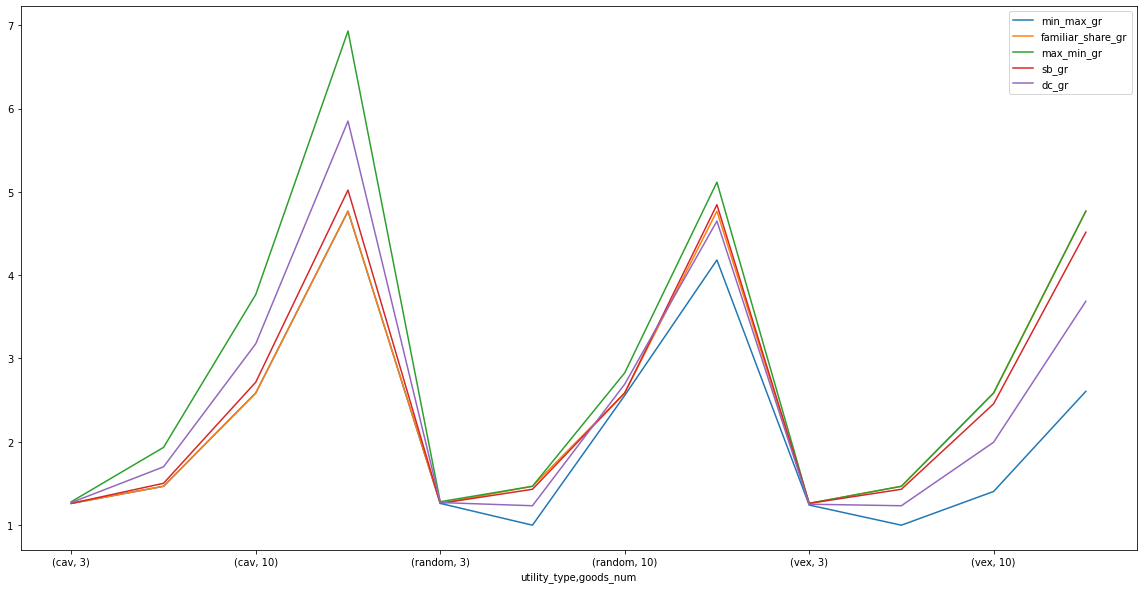

In [7]:
random_exp_data.plot(figsize=(20, 10))

as seen from the graph all guarantees values lies beetween min_max and max_min guarantees. </br>
now i will try to find experiment where this condition violates

In [18]:
data['max_guarantee'] = data[guarantees_columns].idxmax(axis=1)
data['min_guarantee'] = data[guarantees_columns].idxmin(axis=1)

data[data['max_min_gr'].round(PRECISION) < data[guarantees_columns].max(axis=1).round(PRECISION)]

,Unnamed: 0,dc_gr,max_min_gr,familiar_share_gr,sb_gr,min_max_gr,goods_num,utility_type,max_guarantee,min_guarantee


In [19]:
data[data['min_max_gr'].round(PRECISION) > data[guarantees_columns].min(axis=1).round(PRECISION)]

,Unnamed: 0,dc_gr,max_min_gr,familiar_share_gr,sb_gr,min_max_gr,goods_num,utility_type,max_guarantee,min_guarantee


Looks like there is no violation for used prcision (10 decimal digits)

### Calculate ratios statistics

In [31]:
ratios = pd.DataFrame()
gr = ('dc_gr','familiar_share_gr', 'sb_gr')
for g in ('dc_gr','familiar_share_gr', 'sb_gr'):
    for gd in guarantees_columns:
        if g == gd:
            continue
            
        ratios[f'{g}/{gd}'] = data[g]/data[gd]

ratios['utility_type'] = data['utility_type']
ratios['goods_num'] = data['goods_num']


ratios.groupby(['utility_type', 'goods_num']).var()

dc_gr/min_max_gr  dc_gr/familiar_share_gr  \
utility_type goods_num                                              
cav          3                  0.008387                 0.008387   
             5                  0.007038                 0.007038   
             10                 0.003766                 0.003766   
             20                 0.001555                 0.001555   
random       3                  0.062952                 0.022358   
             5                  0.039864                 0.020334   
             10                 0.005239                 0.008709   
             20                 0.003419                 0.006218   
vex          3                  0.119792                 0.008387   
             5                  0.153603                 0.007038   
             10                 0.067371                 0.003766   
             20                 0.027958                 0.001555   

                        dc_gr/max_min_gr  dc_gr/sb_gr  \
utility_type goods_num                                  
cav          3                  0.002566     0.002485   
             5                  0.001755     0.001333   
             10                 0.000837     0.000824   
             20                 0.000317     0.000570   
random       3                  0.007176     0.011156   
             5                  0.004497     0.010562   
             10                 0.001507     0.007101   
             20                 0.001170     0.005523   
vex          3                  0.008387     0.003173   
             5                  0.007038     0.002189   
             10                 0.003766     0.001462   
             20                 0.001555     0.000840   

                        familiar_share_gr/min_max_gr  \
utility_type goods_num                                 
cav          3                              0.000000   
             5                              0.000000   
             10                             0.000000   
             20                             0.000000   
random       3                              0.274389   
             5                              0.191331   
             10                             0.026639   
             20                             0.019699   
vex          3                              0.479169   
             5                              0.614412   
             10                             0.269483   
             20                             0.111830   

                        familiar_share_gr/max_min_gr  familiar_share_gr/sb_gr  \
utility_type goods_num                                                          
cav          3                              0.010264                 0.003516   
             5                              0.007021                 0.002816   
             10                             0.003348                 0.001351   
             20                             0.001267                 0.000516   
random       3                              0.013516                 0.005164   
             5                              0.010555                 0.003560   
             10                             0.006719                 0.000664   
             20                             0.004272                 0.000183   
vex          3                              0.000000                 0.007383   
             5                              0.000000                 0.006015   
             10                             0.000000                 0.002465   
             20                             0.000000                 0.001011   

                        familiar_share_gr/dc_gr  sb_gr/min_max_gr  \
utility_type goods_num                                              
cav          3                         0.004331          0.004890   
             5                         0.003243          0.003955   
             10                        0.001640          0.001

Ratios mean

In [34]:
ratios.groupby(['utility_type', 'goods_num']).mean()

dc_gr/min_max_gr  dc_gr/familiar_share_gr  \
utility_type goods_num                                              
cav          3                  1.179151                 1.179151   
             5                  1.229229                 1.229229   
             10                 1.232131                 1.232131   
             20                 1.245045                 1.245045   
random       3                  1.173529                 0.989175   
             5                  1.190708                 0.976430   
             10                 1.118602                 1.013272   
             20                 1.102856                 0.986705   
vex          3                  1.367708                 0.820849   
             5                  1.532659                 0.770771   
             10                 1.489840                 0.767869   
             20                 1.505682                 0.754955   

                        dc_gr/max_min_gr  dc_gr/sb_gr  \
utility_type goods_num                                  
cav          3                  0.874795     1.120140   
             5                  0.847555     1.146407   
             10                 0.843860     1.154755   
             20                 0.836481     1.161122   
random       3                  0.898903     0.986864   
             5                  0.879339     0.972659   
             10                 0.908485     1.009736   
             20                 0.917928     0.988079   
vex          3                  0.820849     0.865387   
             5                  0.770771     0.828999   
             10                 0.767869     0.821971   
             20                 0.754955     0.813525   

                        familiar_share_gr/min_max_gr  \
utility_type goods_num                                 
cav          3                              1.000000   
             5                              1.000000   
             10                             1.000000   
             20                             1.000000   
random       3                              1.243165   
             5                              1.267861   
             10                             1.116087   
             20                             1.127318   
vex          3                              1.735416   
             5                              2.065318   
             10                             1.979680   
             20                             2.011363   

                        familiar_share_gr/max_min_gr  familiar_share_gr/sb_gr  \
utility_type goods_num                                                          
cav          3                              0.749590                 0.953753   
             5                              0.695110                 0.935851   
             10                             0.687720                 0.938782   
             20                             0.672963                 0.933138   
random       3                              0.923349                 1.006119   
             5                              0.913835                 1.003079   
             10                             0.903443                 0.997655   
             20                             0.934980                 1.001860   
vex          3                              1.000000                 1.061994   
             5                              1.000000                 1.082856   
             10                             1.000000                 1.073856   
             20                             1.000000                 1.078829   

                        familiar_share_gr/dc_gr  sb_gr/min_max_gr  \
utility_type goods_num                                              
cav          3                         0.853110          1.052787   
             5                         0.817353          1.072070   
             10                        0.813596          1.066

Ratios variance

In [33]:
ratios.groupby(['utility_type', 'goods_num']).var()

dc_gr/min_max_gr  dc_gr/familiar_share_gr  \
utility_type goods_num                                              
cav          3                  0.008387                 0.008387   
             5                  0.007038                 0.007038   
             10                 0.003766                 0.003766   
             20                 0.001555                 0.001555   
random       3                  0.062952                 0.022358   
             5                  0.039864                 0.020334   
             10                 0.005239                 0.008709   
             20                 0.003419                 0.006218   
vex          3                  0.119792                 0.008387   
             5                  0.153603                 0.007038   
             10                 0.067371                 0.003766   
             20                 0.027958                 0.001555   

                        dc_gr/max_min_gr  dc_gr/sb_gr  \
utility_type goods_num                                  
cav          3                  0.002566     0.002485   
             5                  0.001755     0.001333   
             10                 0.000837     0.000824   
             20                 0.000317     0.000570   
random       3                  0.007176     0.011156   
             5                  0.004497     0.010562   
             10                 0.001507     0.007101   
             20                 0.001170     0.005523   
vex          3                  0.008387     0.003173   
             5                  0.007038     0.002189   
             10                 0.003766     0.001462   
             20                 0.001555     0.000840   

                        familiar_share_gr/min_max_gr  \
utility_type goods_num                                 
cav          3                              0.000000   
             5                              0.000000   
             10                             0.000000   
             20                             0.000000   
random       3                              0.274389   
             5                              0.191331   
             10                             0.026639   
             20                             0.019699   
vex          3                              0.479169   
             5                              0.614412   
             10                             0.269483   
             20                             0.111830   

                        familiar_share_gr/max_min_gr  familiar_share_gr/sb_gr  \
utility_type goods_num                                                          
cav          3                              0.010264                 0.003516   
             5                              0.007021                 0.002816   
             10                             0.003348                 0.001351   
             20                             0.001267                 0.000516   
random       3                              0.013516                 0.005164   
             5                              0.010555                 0.003560   
             10                             0.006719                 0.000664   
             20                             0.004272                 0.000183   
vex          3                              0.000000                 0.007383   
             5                              0.000000                 0.006015   
             10                             0.000000                 0.002465   
             20                             0.000000                 0.001011   

                        familiar_share_gr/dc_gr  sb_gr/min_max_gr  \
utility_type goods_num                                              
cav          3                         0.004331          0.004890   
             5                         0.003243          0.003955   
             10                        0.001640          0.001